##**MPLSOCCER library**##

Introduction to football analysis using a Python library MPLSoccer and some statistics regarding Erling Haaland and Joao Cancelo.
Basic visualisations on a vertical pitch and some graphs.

In [ ]:
pip install mplsoccer

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from mplsoccer import VerticalPitch

In [ ]:
df=pd.read_csv("haaland_stats.csv")

In [ ]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,479846,20,MissedShots,0.936,0.503,0.484085,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Phil Foden,Cross
1,479847,35,Goal,0.885,0.500,0.761169,Erling Haaland,a,8260,Penalty,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,NaN,Standard
2,479854,64,Goal,0.864,0.405,0.328053,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Kevin De Bruyne,Throughball
3,479855,69,MissedShots,0.953,0.552,0.526608,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Jack Grealish,Chipped
4,479856,75,BlockedShot,0.894,0.710,0.066443,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Ilkay Gündogan,Pass


**Obrada podataka**

In [ ]:
df['X']=df['X']*100
df['Y']=df['Y']*100

**Editing columns**

In [ ]:
total_shots=df.shape[0]
total_goals=df[df['result']=='Goal'].shape[0]
total_xG=df['xG'].sum()
xG_per_shot=total_xG/total_shots

In [ ]:
points_average_distance=df['X'].mean()
actual_average_distance=120-(df['X']*1.2).mean()

In [ ]:
bg_color="#0C0D0E"

**Import fonts**

In [ ]:
import matplotlib.font_manager as font_manager

font_path="Arvo-Regular.ttf"
prop=font_manager.FontProperties(fname=font_path)

**Plotting the pitch**

The visualisation is split into 3 parts ax1,ax2,ax3. Circular shapes are created using .scatter.

Text(0.63, 0, '0.27')

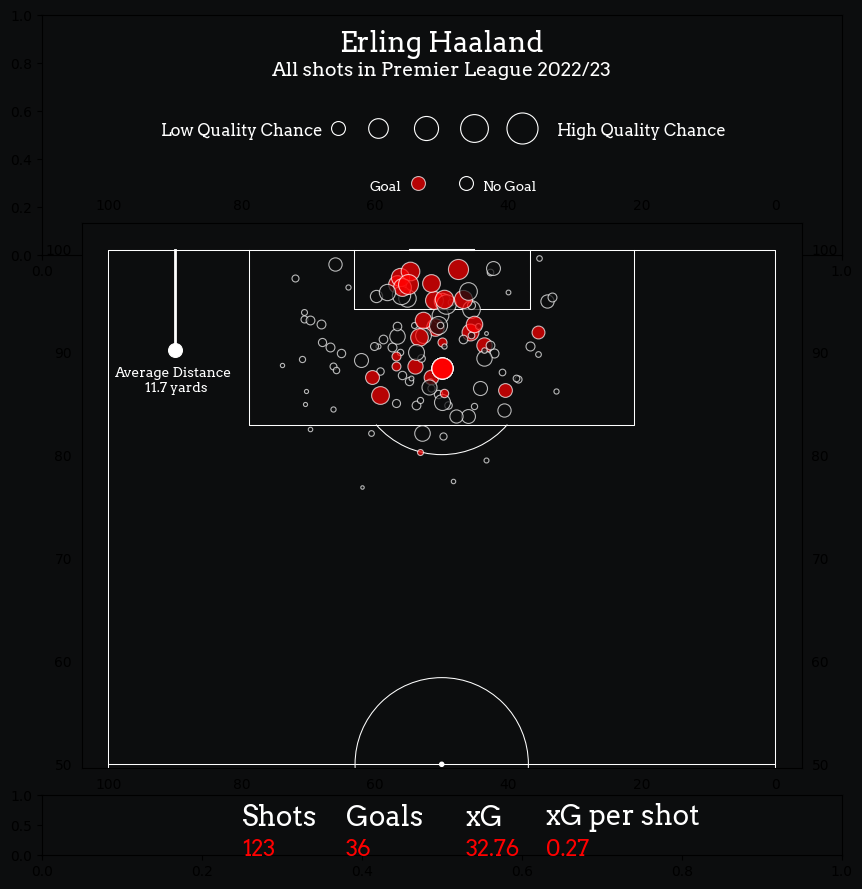

In [ ]:
fig=plt.figure(figsize=(8,12))
fig.patch.set_facecolor(bg_color)

ax1=fig.add_axes([0,.7,1,.2])
ax1.set_facecolor(bg_color)

ax1.text(
    x=.5,
    y=.85,
    s='Erling Haaland',
    fontsize=20,
    fontproperties=prop,
    fontweight='bold',
    color='white',
    ha='center',
)

ax1.text(
    x=.5,
    y=.75,
    s='All shots in Premier League 2022/23',
    fontsize=14,
    fontproperties=prop,
    fontweight='bold',
    color='white',
    ha='center',
)

ax1.text(
    x=.25,
    y=.5,
    s='Low Quality Chance',
    fontsize=12,
    fontproperties=prop,
    fontweight='bold',
    color='white',
    ha='center',
)

#prazni krugovi

ax1.scatter(
    x=.37,
    y=.53,
    s=100,
    color=bg_color,
    edgecolor='white',
    linewidth=.8
)

ax1.scatter(
    x=.42,
    y=.53,
    s=200,
    color=bg_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=.48,
    y=.53,
    s=300,
    color=bg_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=.54,
    y=.53,
    s=400,
    color=bg_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=.6,
    y=.53,
    s=500,
    color=bg_color,
    edgecolor='white',
    linewidth=.8
)

#dva kruga

ax1.text(
    x=.45,
    y=.27,
    s=f'Goal',
    fontsize=10,
    fontproperties=prop,
    color='white',
    ha='right',
)

ax1.scatter(
    x=.47,
    y=.3,
    s=100,
    color='red',
    edgecolor='white',
    linewidth=.8,
    alpha=.7
)

ax1.scatter(
    x=.53,
    y=.3,
    s=100,
    color=bg_color,
    edgecolor='white',
    linewidth=.8
)

ax1.text(
    x=.55,
    y=.27,
    s=f'No Goal',
    fontsize=10,
    fontproperties=prop,
    color='white',
    ha='left',
)


ax1.text(
    x=.75,
    y=.5,
    s='High Quality Chance',
    fontsize=12,
    fontproperties=prop,
    fontweight='bold',
    color='white',
    ha='center',
)

ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

ax2=fig.add_axes([.05,.25,.9,.5])
ax2.set_facecolor(bg_color)

pitch=VerticalPitch(
    pitch_type='opta',
    half=True,
    pitch_color=bg_color,
    pad_bottom=.5,
    line_color='white',
    linewidth=.75,
    axis=True,
    label=True
)

pitch.draw(ax=ax2)

ax2.scatter(x=90,
            y=points_average_distance,
            s=100,
            color='white',
            linewidth=.8)

ax2.plot([90,90],[100,points_average_distance],color='white',linewidth=2)

ax2.scatter(x=90,
            y=actual_average_distance,
            s=100,
            color='white',
            linewidth=.8)

ax2.text(
    x=90,
    y=points_average_distance-4,
    s=f'Average Distance \n {actual_average_distance:.1f} yards',
    fontsize=10,
    fontproperties=prop,
    color='white',
    ha='center'
)

for x in df.to_dict(orient='records'):
  pitch.scatter(
      x['X'],
      x['Y'],
      s=300*x['xG'],
      color='red' if x['result']=='Goal' else bg_color,
      ax=ax2,
      alpha=.7,
      linewidth=.8,
      edgecolor='white'
  )

ax3=fig.add_axes([0,.2,1,.05])
ax3.set_facecolor(bg_color)

ax3.text(x=.25,y=.5,s='Shots',fontsize=20, fontproperties=prop,color='white',ha='left',fontweight='bold')
ax3.text(x=.25, y=0, s=f'{total_shots}',fontsize=16, fontproperties=prop, color='red', ha='left')

ax3.text(x=.38,y=.5,s='Goals',fontsize=20, fontproperties=prop,color='white',ha='left',fontweight='bold')
ax3.text(x=.38, y=0, s=f'{total_goals}',fontsize=16, fontproperties=prop, color='red', ha='left')

ax3.text(x=.53,y=.5,s='xG',fontsize=20, fontproperties=prop,color='white',ha='left',fontweight='bold')
ax3.text(x=.53, y=0, s=f'{total_xG:.2f}',fontsize=16, fontproperties=prop, color='red', ha='left')

ax3.text(x=.63,y=.5,s='xG per shot',fontsize=20, fontproperties=prop,color='white',ha='left',fontweight='bold')
ax3.text(x=.63, y=0, s=f'{xG_per_shot:.2f}',fontsize=16, fontproperties=prop, color='red', ha='left')




##**Pie Charts**##

In [ ]:
import numpy as np
from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager


In [ ]:
df = pd.read_csv("pizza_tutorial.csv")

In [ ]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tackles,Tkls Won,...,Dribbled Past,Successful Pressures,Def 3rd Press,Mid 3rd Press,Att 3rd Press,Blocks,Interceptions,Tkl+Int,Clearances,Errors
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-259,1990,19.7,1.62,0.96,...,1.37,3.45,6.55,2.84,1.02,1.57,1.73,3.35,2.03,0.05
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-225,1997,11.6,0.69,0.34,...,0.43,3.28,1.12,6.12,6.72,0.78,0.17,0.86,1.47,0.00
2,3,Che Adams\Che-Adams,sco SCO,FW,Southampton,24-306,1996,28.1,1.03,0.57,...,0.57,4.70,1.71,5.41,7.12,0.89,0.36,1.39,0.57,0.04
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-233,1997,29.8,1.28,0.77,...,0.54,1.78,3.66,1.64,0.23,1.17,1.68,2.95,7.38,0.03
4,5,Adrián\Adrian,es ESP,GK,Liverpool,34-132,1987,3.0,0.00,0.00,...,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.33


In [ ]:
df['Player']=df['Player'].str.split('\\', expand=True)[0]

In [ ]:
df=df.loc[(df['Pos']=='DF') & (df['90s']>=15)]

In [ ]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tackles,Tkls Won,...,Dribbled Past,Successful Pressures,Def 3rd Press,Mid 3rd Press,Att 3rd Press,Blocks,Interceptions,Tkl+Int,Clearances,Errors
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,30-259,1990,19.7,1.62,0.96,...,1.37,3.45,6.55,2.84,1.02,1.57,1.73,3.35,2.03,0.05
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,23-233,1997,29.8,1.28,0.77,...,0.54,1.78,3.66,1.64,0.23,1.17,1.68,2.95,7.38,0.03
6,7,Ola Aina,ng NGA,DF,Fulham,24-219,1996,28.9,1.63,0.87,...,0.80,2.11,4.74,3.11,0.76,1.56,1.76,3.39,4.19,0.00
8,9,Semi Ajayi,ng NGA,DF,West Brom,27-187,1993,27.9,2.04,1.47,...,0.54,4.48,7.46,3.33,0.57,1.90,1.25,3.30,4.70,0.07
12,13,Toby Alderweireld,be BEL,DF,Tottenham,32-074,1989,21.9,1.55,0.73,...,0.50,2.97,5.16,3.06,0.14,1.96,0.46,2.01,6.80,0.00


In [ ]:
df.shape

(91, 21)

Dropping columns that are not needed so only the most important parameters are used.

In [ ]:
df=df.drop(['Rk','Nation','Pos','Squad','Age','Born'], axis=1).reset_index()

In [ ]:
params=list(df.columns)
print(params)

params=params[2:]

['index', 'Player', '90s', 'Tackles', 'Tkls Won', 'Tkls vs Dribbles', 'Dribbled Past', 'Successful Pressures', 'Def 3rd Press', 'Mid 3rd Press', 'Att 3rd Press', 'Blocks', 'Interceptions', 'Tkl+Int', 'Clearances', 'Errors']


In [ ]:
player=df.loc[df['Player']=='João Cancelo'].reset_index()
player=list(player.loc[0])

player=player[3:]

In [ ]:
player

[25.4,
 3.03,
 1.69,
 1.61,
 1.89,
 4.76,
 5.35,
 4.92,
 2.99,
 1.5,
 2.05,
 5.08,
 1.42,
 0.04]

In [ ]:
print(len(params),len(player))

14 14


In [ ]:
values=[]
for x in range(len(params)):
  values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))


In [ ]:
len(params)

14

**Chart**

Basic pizza chart visualization available from the mplsoccer documentation. Some parts are edited a bit.

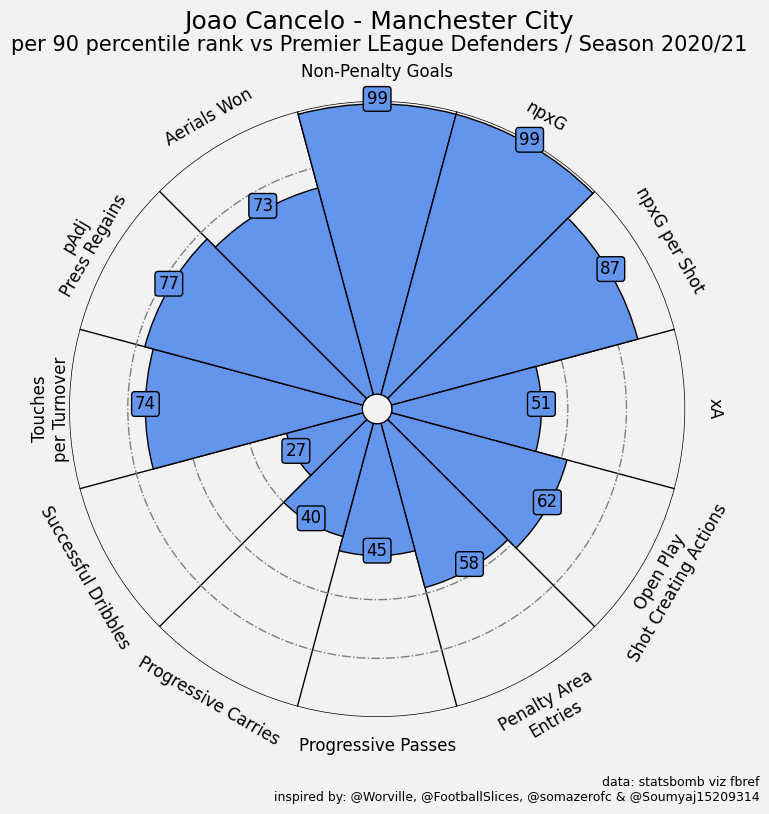

In [ ]:
# parameter list
params = [
    "Non-Penalty Goals", "npxG", "npxG per Shot", "xA", "Open Play\nShot Creating Actions",
    "\nPenalty Area\nEntries", "Progressive Passes", "Progressive Carries",
    "Successful Dribbles", "\nTouches\nper Turnover", "pAdj\nPress Regains", "Aerials Won"
]

# values for corresponding parameters
# The values are taken from the excellent fbref website (supplied by StatsBomb)
values = [99, 99, 87, 51, 62, 58, 45, 40, 27, 74, 77, 73]

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Joao Cancelo - Manchester City", size=18,
    ha="center", color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "per 90 percentile rank vs Premier LEague Defenders / Season 2020/21",
    size=15,
    ha="center", color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#000000",
    ha="right"
)

plt.show()